# Neural Networks I

### References
- [Math for Machine Learning: Multivariate Calculus](https://www.coursera.org/learn/multivariate-calculus-machine-learning)
- [Stepic. Нейронные сети](https://stepik.org/course/401)
- [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/)

![Test](images/nn_brains.png)

In [8]:
import numpy as np

#display results
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('grayscale')
              
%matplotlib inline

In [9]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

##  Neural Networks 
- like a **mathematical function** takes variable IN and gives some BACK

\begin{align}
{y} & = f(x)
\end{align}

![](images/nn_in_out_simple.png)

$$ \mathbf{a}^{(1)} = \sigma(\mathbf{w}^{(1)} * \mathbf{a}^{(0)} + \mathbf{b}^{(1)}) $$

### Definitions
- a -> **activity**
- w -> **weigth**
- b -> **bias**
- sigma -> **activation function** (associated with brains, neuron activated)

### Why A = WX + B?

![](images/y-mxpb-graph.svg)

### More Definitions
$$ \mathbf{z}^{(1)} =  \mathbf{w}^{(1)} * \mathbf{a}^{(0)} + \mathbf{b}^{(1)} $$


$$ \mathbf{a}^{(1)} = \sigma(\mathbf{z}^{(1)}) $$

- sigma => **tanh**, **RELU**, ... [more](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)

![](images/sigmoid_tanh.jpeg)

$$ \tanh = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}} $$

$$ \sigma = \frac{1}{1 + e^{-z}} $$

### Forward Pass

![](images/nn_in_out_simple.png)

$$ \mathbf{a}^{(1)} = \sigma(\mathbf{w}^{(1)} * \mathbf{a}^{(0)} + \mathbf{b}^{(1)}) $$

In [14]:
σ = np.tanh

w1 = 1.3  # weight
b1 = -0.1  # bias

def a1(a0) :
    return σ(w1 * a0 + b1)

for x in [0, 1]:
    a1(x)

### Make more neurons

![](images/nn_3_neurons.png)

$$ \mathbf{a}^{(1)} = \sigma(\mathbf{w_0} * \mathbf{a}_0^{(0)} + \mathbf{w_1} * \mathbf{a}_1^{(0)} + \mathbf{b}^{(1)}) $$

![](images/nn_4_neurons.png)

$$ \mathbf{a}^{(1)} = \sigma(\mathbf{w_0} * \mathbf{a}_0^{(0)} + \mathbf{w_1} * \mathbf{a}_1^{(0)} + \mathbf{w_2} * \mathbf{a}_2^{(0)} + \mathbf{b}^{(1)}) $$

$$ \mathbf{a}^{(1)} = \sigma((\sum_{j=0}^n w_j * a_j^{0}) + b) $$

### Simplify with dot product 
- **vector of weights** * **vector of inputs** (sum of element-wise multiplications)

$$ \mathbf{a}^{(1)} = \sigma(w * a^{0} + b) $$

### More Neurons

![](images/nn_5_neurons.png)

$$ \mathbf{a}_0^{(1)} = \sigma(w_0 * a^{0} + b_0) $$

- w0 -> vector of **greens**
- a0 -> vector of white circles

$$ \mathbf{a}_1^{(1)} = \sigma(w_1 * a^{0} + b_1) $$

- w1 -> vector of **pinks**
- a0 -> vector of white circles

### Simplify with dot product
- **matrix of vectors of weights** * **vector of inputs**

$$ \mathbf{a}^{(1)} = \sigma(W^{(1)} * a^{(0)} + b^{(1)}) $$

### Numpy Examples 
- numpy_basics.ipynb

### Example

![](images/nn_quiz_1.png)

In [34]:
# First set up the network.
σ = np.tanh

W = np.array([[-2, 4, -1],[6, 0, -3]])
print(f"Weights {W.shape}: \n {W} \n")

b = np.array([0.1, -2.5])
print(f"Biases {b.shape}: \n {b} \n")

# Define our input vector
a0 = np.array([0.3, 0.4, 0.1])
print(f"Inputs (a0) {a0.shape}: \n {a0} \n")

print(f"Weights {W.T.shape}: \n {W.T} \n")

a1 = σ(a0 @ W.T + b)

print(f"Outputs (a1) {a1.shape}: \n {a1} \n")

Weights (2, 3): 
 [[-2  4 -1]
 [ 6  0 -3]] 

Biases (2,): 
 [ 0.1 -2.5] 

Inputs (a0) (3,): 
 [0.3 0.4 0.1] 

Weights (3, 2): 
 [[-2  6]
 [ 4  0]
 [-1 -3]] 

Outputs (a1) (2,): 
 [ 0.76159416 -0.76159416] 



### And even more neurons

![](images/nn_layers.png)

### Hidden Layers

![](images/nn_multi_layer.png)

$$ \mathbf{a}^{(1)} = \sigma(W^{(1)} * a^{(0)} + b^{(1)}) $$

- Input of current layer = Output of next layer

$$ \mathbf{a}^{(2)} = \sigma(W^{(2)} * a^{(1)} + b^{(2)}) $$

![Test](images/nn_example.png)

$$ \mathbf{a}^{(L)} = \sigma(W^{(L)} * a^{(L-1)} + b^{(L)}) $$

## Training

- Matching **input** to **target output**

### Quiz

Let's assume we want to train the network to give a NOT function, that is if you input 1 it returns 0, and if you input 0 it returns 1.

Which of given **w**, **b** are suitable for network to implement NOT function? 

$$ f(0) = 1,$$ 
$$ f(1) = 0 $$


- w(1) = 10, b(1) = 0
- w(1) = -5, b(1) = 5
- w(1) = 3, b(1) = 1
- w(1) = -3, b(1) = 0
- w(1) = 0, b(1) = 5

In [ ]:
σ = np.tanh

w1 = 1.3  # weight
b1 = -0.1  # bias

def a1(a0) :
    return σ(w1 * a0 + b1)

for x in [0, 1]:
    a1(x)

### ?

### Cost Function

![](images/nn_backprop_1.png)

$$ C = \sum_i(a_j^{(L)} - y_j)^2 $$

- aj - output of neurons
- yj - target output

In [17]:
σ = np.tanh

w1 = 1.3  # weight
b1 = -0.1  # bias

def a1(w1, b1, a0) :
    return σ(w1 * a0 + b1)

def C(w1, b1, a0, y):
    a1_output = a1(w1, b1, a0)
    return (a1_output - y)**2

In [27]:
min_w, max_w, num = -10, 10, 100
step = (max_w - min_w) / num 

x = 1  # f(0) = 1 
y = 0  # 

weights = np.linspace(min_w, max_w, num)
biases = np.linspace(min_w, max_w, num)

w=widgets.FloatSlider(min=min_w,max=max_w,step=step,value=min_w, description="weights")
b=widgets.FloatSlider(min=min_w,max=max_w,step=step,value=0, description="bias")
@interact(w=w, b=b)
def calculate(w, b):
    costs = np.array([C(w, b, x, y) for w in weights])
    cost = C(w, b, x, y)
    
    plt.scatter(w, cost, c="red")
    plt.plot(weights, costs, c="green")
    plt.xlabel("weight")
    plt.ylabel("cost function")
    plt.show()
    
    print(f"weight: {w}, bias: {b}, cost: {cost}")  


interactive(children=(FloatSlider(value=-10.0, description='weights', max=10.0, min=-10.0, step=0.2), FloatSli…

### So we want to Minimize Cost Function
- in other words: Find Local Minima of Function

### Geometrical Interpretation
- Gradient Descent

![](images/nn_backprop_2.png)

- **Gradient** -> **direction of function growth**

![](images/nn_backprop_3.png)

- **- Gradient** -> Direction of function decrease

![](images/nn_backprop_4.png)

### Local Minimum Problem

![](images/nn_backprop_5.png)

### More weights - more difficult it to visualize

![](images/nn_backprop_6.png)

### Example

In [42]:
# Define the activation function.
sigma = np.tanh

# Let's use a random initial weight and bias.
W = np.array([[-0.94529712, -0.2667356 , -0.91219181],
              [ 2.05529992,  1.21797092,  0.22914497]])
b = np.array([ 0.61273249,  1.6422662 ])

# define our feed forward function
def a1 (a0) :
  # Notice the next line is almost the same as previously,
  # except we are using matrix multiplication rather than scalar multiplication
  # hence the '@' operator, and not the '*' operator.
  z = W @ a0 + b
  # Everything else is the same though,
  return sigma(z)

# Next, if a training example is,
x = np.array([0.1, 0.5, 0.6])
y = np.array([0.25, 0.75])

# Then the cost function is,
d = a1(x) - y # Vector difference between observed and expected activation
C = d @ d # Absolute value squared of the difference.

print (C)

0.22604860306887117


### Back propagation

### Matrices in Python

Element wise: when two matrices have the same dimensions, matrix elements in the same position in each matrix are multiplied together
In python this uses the '$*$' operator.
```python
A = B * C
```

Matrix multiplication: when the number of columns in the first matrix is the same as the number of rows in the second.
In python this uses the '$@$' operator
```python
A = B @ C
```

![Neural network with 2 hidden layers. There is 1 nodes in the zeroth layer, 6 in the first, 7 in the second, and 2 in the third.](images/big_net.png "The structure of the network we will consider in this assignment.")

#### Feed forward

In the following cell, we will define functions to set up our neural network.
Namely an activation function, $\sigma(z)$, it's derivative, $\sigma'(z)$, a function to initialise weights and biases, and a function that calculates each activation of the network using feed-forward.

Recall the feed-forward equations,
$$ \mathbf{a}^{(n)} = \sigma(\mathbf{z}^{(n)}) $$
$$ \mathbf{z}^{(n)} = \mathbf{W}^{(n)}\mathbf{a}^{(n-1)} + \mathbf{b}^{(n)} $$

In this worksheet we will use the *logistic function* as our activation function, rather than the more familiar $\tanh$.
$$ \sigma(\mathbf{z}) = \frac{1}{1 + \exp(-\mathbf{z})} $$


### Jacobian
- partial derivatives of Cost Function

- influence of **W**

$$ \mathbf{J}_{\mathbf{W}^{(3)}} = \frac{\partial C}{\partial \mathbf{W}^{(3)}} $$

- influence of **B**

$$ \mathbf{J}_{\mathbf{b}^{(3)}} = \frac{\partial C}{\partial \mathbf{b}^{(3)}} $$

- where $C$ is the average cost function over the training set. i.e.,
$$ C = \frac{1}{N}\sum_k C_k $$

- Chain Rule for **W**
$$ \frac{\partial C}{\partial \mathbf{W}^{(3)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{z}^{(3)}}
   \frac{\partial \mathbf{z}^{(3)}}{\partial \mathbf{W}^{(3)}}
   ,$$

- Chain Rule for **B**


$$ \frac{\partial C}{\partial \mathbf{b}^{(3)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{z}^{(3)}}
   \frac{\partial \mathbf{z}^{(3)}}{\partial \mathbf{b}^{(3)}}
   .$$

- How C is influenced by **a**

$$ \frac{\partial C}{\partial \mathbf{a}^{(3)}} = 2(\mathbf{a}^{(3)} - \mathbf{y}) $$

- How A is influenced by **z**

$$ \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{z}^{(3)}} = \sigma'({z}^{(3)})$$

- How Z is influenced by **W**

$$ \frac{\partial \mathbf{z}^{(3)}}{\partial \mathbf{W}^{(3)}} = \mathbf{a}^{(2)}$$

- How Z is influenced by **B**

$$ \frac{\partial \mathbf{z}^{(3)}}{\partial \mathbf{b}^{(3)}} = 1$$

### Example

In [15]:
# First define our sigma function.
sigma = np.tanh
sigma_h = lambda z: 1 / np.cosh(z)**2 

# Next define the feed-forward equation.
def a1 (w1, b1, a0) :
    z = w1 * a0 + b1
    return sigma(z)

# The individual cost function is the square of the difference between
# the network output and the training data output.
def C (w1, b1, x, y) :
    return (a1(w1, b1, x) - y)**2

# This function returns the derivative of the cost function with
# respect to the weight.
def dCdw (w1, b1, x, y) :
    z = w1 * x + b1
    dCda = 2 * (a1(w1, b1, x) - y) # Derivative of cost with activation
    dadz = 1/np.cosh(z)**2 # derivative of activation with weighted sum z
    dzdw = x # derivative of weighted sum z with weight
    return dCda * dadz * dzdw # Return the chain rule product.

# This function returns the derivative of the cost function with
# respect to the bias.
# It is very similar to the previous function.
# You should complete this function.
def dCdb (w1, b1, x, y) :
    z = w1 * x + b1
    dCda = 2 * (a1(w1, b1, x) - y)
    dadz = sigma_h(z)
    dzdb = 1
    return dCda * dadz * dzdb

"""Test your code before submission:"""
# Let's start with an unfit weight and bias.
w1 = -5
b1 = 5
# We can test on a single data point pair of x and y.
x = 0
y = 1
# Output how the cost would change
# in proportion to a small change in the bias
print(dCdb(w1, b1, x, y))
print(dCdw(w1, b1, x, y))

-3.297396670781138e-08
-0.0


### Example

In [16]:
# Here is the activation function and its derivative.
sigma = lambda z : 1 / (1 + np.exp(-z))
d_sigma = lambda z : np.cosh(z/2)**(-2) / 4

global W1, W2, W3, b1, b2, b3
W1 = None
W2 = None
W3 = None
b1 = None
b2 = None
b3 = None
    
# This function initialises the network with it's structure, it also resets any training already done.
def reset_network (n1 = 6, n2 = 7, random=np.random) :
    global W1, W2, W3, b1, b2, b3
    W1 = random.randn(n1, 1) / 2
    W2 = random.randn(n2, n1) / 2
    W3 = random.randn(2, n2) / 2
    b1 = random.randn(n1, 1) / 2
    b2 = random.randn(n2, 1) / 2
    b3 = random.randn(2, 1) / 2

# This function feeds forward each activation to the next layer. It returns all weighted sums and activations.
def network_function(a0) :
    z1 = W1 @ a0 + b1
    a1 = sigma(z1)
    z2 = W2 @ a1 + b2
    a2 = sigma(z2)
    z3 = W3 @ a2 + b3
    a3 = sigma(z3)
    return a0, z1, a1, z2, a2, z3, a3

# This is the cost function of a neural network with respect to a training set.
def cost(x, y) :
    return np.linalg.norm(network_function(x)[-1] - y)**2 / x.size

In [17]:
# Jacobian for the third layer weights. There is no need to edit this function.
def J_W3 (x, y) :
    # First get all the activations and weighted sums at each layer of the network.
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    # We'll use the variable J to store parts of our result as we go along, updating it in each line.
    # Firstly, we calculate dC/da3, using the expressions above.
    J = 2 * (a3 - y)
    # Next multiply the result we've calculated by the derivative of sigma, evaluated at z3.
    J = J * d_sigma(z3)
    # Then we take the dot product (along the axis that holds the training examples)
    # with the final partial derivative,
    # i.e. dz3/dW3 = a2
    # and divide by the number of training examples, for the average over all training examples.
    J = J @ a2.T / x.size
    # Finally return the result out of the function.
    return J

# In this function, you will implement the jacobian for the bias.
# As you will see from the partial derivatives, only the last partial derivative is different.
# The first two partial derivatives are the same as previously.
def J_b3 (x, y) :
    # As last time, we'll first set up the activations.
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    # Next you should implement the first two partial derivatives of the Jacobian.
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    # For the final line, we don't need to multiply by dz3/db3, because that is multiplying by 1.
    # We still need to sum over all training examples however.    
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

We'll next do the Jacobian for the Layer 2. The partial derivatives for this are,
$$ \frac{\partial C}{\partial \mathbf{W}^{(2)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \left(
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}}
   \right)
   \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{z}^{(2)}}
   \frac{\partial \mathbf{z}^{(2)}}{\partial \mathbf{W}^{(2)}}
   ,$$
$$ \frac{\partial C}{\partial \mathbf{b}^{(2)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \left(
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}}
   \right)
   \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{z}^{(2)}}
   \frac{\partial \mathbf{z}^{(2)}}{\partial \mathbf{b}^{(2)}}
   .$$
This is very similar to the previous layer, with two exceptions:
* There is a new partial derivative, in parentheses, $\frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}}$
* The terms after the parentheses are now one layer lower.

Recall the new partial derivative takes the following form,
$$ \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}} =
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{z}^{(3)}}
   \frac{\partial \mathbf{z}^{(3)}}{\partial \mathbf{a}^{(2)}} =
   \sigma'(\mathbf{z}^{(3)})
   \mathbf{W}^{(3)}
$$

To show how this changes things, we will implement the Jacobian for the weight again and ask you to implement it for the bias.

In [18]:
# Compare this function to J_W3 to see how it changes.
# There is no need to edit this function.
def J_W2 (x, y) :
    #The first two lines are identical to in J_W3.
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)    
    J = 2 * (a3 - y)
    # the next two lines implement da3/da2, first σ' and then W3.
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    # then the final lines are the same as in J_W3 but with the layer number bumped down.
    J = J * d_sigma(z2)
    J = J @ a1.T / x.size
    return J

# As previously, fill in all the incomplete lines.
def J_b2 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

Layer 1 is very similar to Layer 2, but with an addition partial derivative term.
$$ \frac{\partial C}{\partial \mathbf{W}^{(1)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \left(
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}}
   \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{a}^{(1)}}
   \right)
   \frac{\partial \mathbf{a}^{(1)}}{\partial \mathbf{z}^{(1)}}
   \frac{\partial \mathbf{z}^{(1)}}{\partial \mathbf{W}^{(1)}}
   ,$$
$$ \frac{\partial C}{\partial \mathbf{b}^{(1)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \left(
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}}
   \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{a}^{(1)}}
   \right)
   \frac{\partial \mathbf{a}^{(1)}}{\partial \mathbf{z}^{(1)}}
   \frac{\partial \mathbf{z}^{(1)}}{\partial \mathbf{b}^{(1)}}
   .$$
You should be able to adapt lines from the previous cells to complete **both** the weight and bias Jacobian.

In [19]:
def J_W1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = (J.T @ W2).T
    J = J * d_sigma(z1)
    J = J @ a0.T / x.size
    return J

def J_b1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = (J.T @ W2).T
    J = J * d_sigma(z1)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

### Let's train

#### Training Data

In [20]:
x = np.array([[ 0., 0.01, 0.02, 0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,  0.1,   0.11,
   0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,  0.19,  0.2,   0.21,  0.22,  0.23,
   0.24,  0.25,  0.26,  0.27,  0.28,  0.29,  0.3,   0.31,  0.32,  0.33,  0.34,  0.35,
   0.36,  0.37,  0.38,  0.39,  0.4,   0.41,  0.42,  0.43,  0.44,  0.45,  0.46,  0.47,
   0.48,  0.49,  0.5,   0.51,  0.52,  0.53,  0.54,  0.55,  0.56,  0.57,  0.58,  0.59,
   0.6,   0.61,  0.62,  0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7,   0.71,
   0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8,   0.81,  0.82,  0.83,
   0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9,   0.91,  0.92,  0.93,  0.94,  0.95,
   0.96,  0.97,  0.98,  0.99,]])
print(type(x), x.shape)

<class 'numpy.ndarray'> (1, 100)


In [21]:
y = np.array([[ 0.5,         0.50009902,  0.50078751,  0.50263171,  0.50615226,  0.5118034,
   0.51995466,  0.53087547,  0.54472343,  0.56153657,  0.58122992,  0.60359653,
   0.62831281,  0.65494819,  0.68297861,  0.7118034,  0.74076505,  0.76917106,
   0.7963171,   0.82151087,  0.84409548,  0.86347181,  0.87911897,  0.89061206,
   0.89763674,  0.9,         0.89763674,  0.89061206,  0.87911897,  0.86347181,
   0.84409548,  0.82151087,  0.7963171,   0.76917106,  0.74076505,  0.7118034,
   0.68297861,  0.65494819,  0.62831281,  0.60359653,  0.58122992,  0.56153657,
   0.54472343,  0.53087547,  0.51995466,  0.5118034,  0.50615226,  0.50263171,
   0.50078751,  0.50009902,  0.5,         0.49990098,  0.49921249,  0.49736829,
   0.49384774,  0.4881966,   0.48004534,  0.46912453,  0.45527657,  0.43846343,
   0.41877008,  0.39640347,  0.37168719,  0.34505181,  0.31702139,  0.2881966,
   0.25923495,  0.23082894,  0.2036829,   0.17848913,  0.15590452,  0.13652819,
   0.12088103,  0.10938794,  0.10236326,  0.1,         0.10236326,  0.10938794,
   0.12088103,  0.13652819,  0.15590452,  0.17848913,  0.2036829,   0.23082894,
   0.25923495,  0.2881966,  0.31702139,  0.34505181,  0.37168719,  0.39640347,
   0.41877008,  0.43846343,  0.45527657,  0.46912453,  0.48004534,  0.4881966,
   0.49384774,  0.49736829,  0.49921249,  0.49990098],
 [ 0.625,       0.62701541,  0.63296789,  0.64258068,  0.65540709,  0.67085156,
   0.68819755,  0.70664083,  0.72532628,  0.74338643,  0.75997967,  0.77432624,
   0.78574006,  0.79365515,  0.79764521,  0.79743558,  0.79290745,  0.78409411,
   0.77116996,  0.75443315,  0.73428307,  0.71119423,  0.68568811,  0.65830476,
   0.62957574,  0.6,         0.57002377,  0.5400257,   0.51030758,  0.4810911,
   0.45252033,  0.42466948,  0.3975551,   0.37115155,  0.34540857,  0.32026952,
   0.29568895,  0.27164821,  0.24816805,  0.22531726,  0.20321693,  0.18203995,
   0.16200599,  0.14337224,  0.12642077,  0.11144335,  0.0987249,  0.08852676,
   0.08107098,  0.07652676,  0.075,       0.07652676,  0.08107098,  0.08852676,
   0.0987249,   0.11144335,  0.12642077,  0.14337224,  0.16200599,  0.18203995,
   0.20321693,  0.22531726,  0.24816805,  0.27164821,  0.29568895,  0.32026952,
   0.34540857,  0.37115155,  0.3975551,  0.42466948,  0.45252033,  0.4810911,
   0.51030758,  0.5400257,   0.57002377,  0.6,         0.62957574,  0.65830476,
   0.68568811,  0.71119423,  0.73428307,  0.75443315,  0.77116996,  0.78409411,
   0.79290745,  0.79743558,  0.79764521,  0.79365515,  0.78574006,  0.77432624,
   0.75997967,  0.74338643,  0.72532628,  0.70664083,  0.68819755,  0.67085156,
   0.65540709,  0.64258068,  0.63296789,  0.62701541,]])

print(type(y), y.shape)

<class 'numpy.ndarray'> (2, 100)


In [22]:
green = (0.6862745098039216, 0.8588235294117647, 0.5215686274509804)
magentaTrans = (0.9882352941176471, 0.4588235294117647, 0.8588235294117647, 0.1)
orange = (0.8549019607843137, 0.6705882352941176, 0.45098039215686275)

In [29]:
def plot_training(x, y, iterations=10000, aggression=3.5, noise=1) :
    global W1, W2, W3, b1, b2, b3
    fig,ax = plt.subplots(figsize=(8, 8), dpi= 80)
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_aspect(1)

    xx = np.arange(0,1.01,0.01)
    yy = np.arange(0,1.01,0.01)
    X, Y = np.meshgrid(xx, yy)
    Z = ((X-0.5)**2 + (Y-1)**2)**(1/2) / (1.25)**(1/2)
    im = ax.imshow(Z, vmin=0, vmax=1, extent=[0, 1, 1, 0])

    ax.plot(y[0],y[1], lw=1.5, color=green);

    while iterations>=0 :
        j_W1 = J_W1(x, y) * (1 + np.random.randn() * noise)
        j_W2 = J_W2(x, y) * (1 + np.random.randn() * noise)
        j_W3 = J_W3(x, y) * (1 + np.random.randn() * noise)
        j_b1 = J_b1(x, y) * (1 + np.random.randn() * noise)
        j_b2 = J_b2(x, y) * (1 + np.random.randn() * noise)
        j_b3 = J_b3(x, y) * (1 + np.random.randn() * noise)

        W1 = W1 - j_W1 * aggression
        W2 = W2 - j_W2 * aggression
        W3 = W3 - j_W3 * aggression
        b1 = b1 - j_b1 * aggression
        b2 = b2 - j_b2 * aggression
        b3 = b3 - j_b3 * aggression

        if (iterations%10==0) :
            # print(x)
            nf = network_function(x)[-1]
            ax.plot(nf[0],nf[1], lw=2, color=magentaTrans);
            # plt.show()
        iterations -= 1

    nf = network_function(x)[-1]
    ax.plot(nf[0],nf[1], lw=2.5, color=orange);
    


In [30]:
reset_network()

The following code will iterate through a steepest descent algorithm using the Jacobians you have calculated.
The function will plot the training data (in green), and your neural network solutions in pink for each iteration, and orange for the last output.

It takes about 50,000 iterations to train this network.
We can split this up though - **10,000 iterations should take about a minute to run**.
Run the line below as many times as you like.

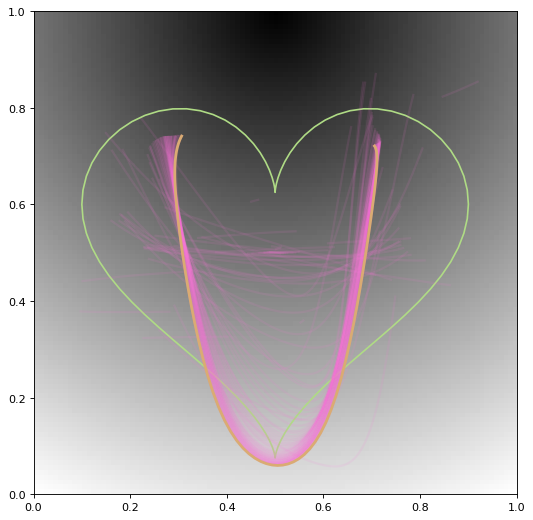

In [31]:
plot_training(x, y, iterations=1000, aggression=7, noise=1)

If you wish, you can change parameters of the steepest descent algorithm (We'll go into more details in future exercises), but you can change how many iterations are plotted, how agressive the step down the Jacobian is, and how much noise to add.

You can also edit the parameters of the neural network, i.e. to give it different amounts of neurons in the hidden layers by calling,
```python
reset_network(n1, n2)
```

Play around with the parameters, and save your favourite result for the discussion prompt - *I ❤️ backpropagation*.